In [1]:
import pandas as pd
import os
import numpy as np
# from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

In [2]:
data_path = os.path.join(os.pardir,"data")

In [3]:
df_throw = pd.read_csv(os.path.join(data_path,"throw_in.csv"))

In [4]:
df_throw

,match_id,index,possession_team,minute,second,player,x,y,endX,endY,end_action,end_team,eventendX,eventendY,duration,length,opposition_team,event_type
0,0,15,184,1,6.0,Erik Pieters,60.0,100.0,78.0,93.5,Pass,32,40.2,65.1,13.0,7,32,"[90, 116, 29, 34, 36, 214, 217]"
1,0,31,32,1,47.0,Bruno Fernandes,60.4,0.0,41.2,5.5,Foul,32,40.6,9.2,19.0,6,184,"[90, 62]"
2,0,84,32,3,59.0,Aaron Wan-Bissaka,63.7,0.0,66.0,9.2,BallRecovery,184,36.4,73.4,5.0,3,184,[92]
3,0,152,184,7,24.0,Erik Pieters,38.1,100.0,37.5,89.1,Foul,32,57.8,10.6,19.0,10,32,"[90, 62]"
4,0,194,184,10,17.0,Erik Pieters,67.5,100.0,81.5,85.1,Pass,32,32.1,13.2,16.0,11,32,"[90, 116, 29, 34, 36, 214, 217]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14886,379,1473,161,88,23.0,Nélson Semedo,43.4,0.0,27.7,6.4,BallTouch,32,41.5,83.6,25.0,14,32,[90]
14887,379,1488,161,88,56.0,Romain Saïss,40.0,0.0,32.9,26.0,Clearance,32,15.7,5.6,32.0,14,32,"[90, 93, 94, 214]"
14888,379,1503,161,89,38.0,Marçal,77.9,100.0,70.7,91.7,Clearance,32,6.8,44.2,29.0,12,32,"[90, 93, 94, 56, 214]"
14889,379,1520,32,90,41.0,Brandon Williams,19.2,0.0,26.9,5.3,Pass,161,66.7,95.3,1.0,1,161,"[90, 118, 116, 29, 138, 204, 35, 37, 216, 217]"


In [5]:
teams = df_throw.possession_team.unique()

In [6]:
zones = [1,2,3]

In [7]:
def calc_zones(x):
    if x <= 100/3:
        return 1
    elif x >= 2*100/3:
        return 3
    else:
        return 2
        

In [8]:
df_throw.end_action.unique()

array(['Pass', 'Foul', 'BallRecovery', 'CornerAwarded', 'Interception',
       'SavedShot', 'End', 'BallTouch', 'Tackle', 'KeeperPickup',
       'BlockedPass', 'OffsideGiven', 'MissedShots', 'Claim', 'Clearance',
       'Goal', 'TakeOn', 'OffsidePass', 'ShieldBallOpp', 'Throw-in',
       'KeeperSweeper', 'Smother', 'Punch', 'OffsideProvoked', 'Aerial',
       'Save', 'GoodSkill'], dtype=object)

Classify zones as def =1  , mid =2 , att =3 

In [9]:
df_throw['zone'] = df_throw['x'].apply(calc_zones)

In [10]:
# Total throw-ins per team 
df_throw.groupby(['possession_team']).size()

possession_team
13     663
14     738
15     732
18     809
19     809
23     724
24     780
26     811
29     741
30     750
31     660
32     760
161    735
162    772
163    750
167    656
170    784
175    727
184    721
211    769
dtype: int64

In [11]:
# Throw_in by zones
df_throw.groupby(['possession_team','zone']).size()

possession_team  zone
13               1       183
                 2       243
                 3       237
14               1       187
                 2       322
                 3       229
15               1       202
                 2       275
                 3       255
18               1       169
                 2       402
                 3       238
19               1       201
                 2       342
                 3       266
23               1       159
                 2       306
                 3       259
24               1       180
                 2       322
                 3       278
26               1       175
                 2       342
                 3       294
29               1       150
                 2       292
                 3       299
30               1       170
                 2       383
                 3       197
31               1       156
                 2       283
                 3       221
32               1   

Adjust coordinates

In [12]:
df_throw['adjX'] = df_throw.apply(lambda row: row['eventendX'] if row['possession_team'] == row['end_team'] else 100-row['eventendX'],axis=1)

In [13]:
df_throw['adjY'] = df_throw.apply(lambda row: row['eventendY'] if row['possession_team'] == row['end_team'] else 100-row['eventendY'],axis=1)

In [28]:
# df_throw['oppx'] = df_throw.apply(lambda row: 100-row['x'],axis=1)
# df_throw['oppy'] = df_throw.apply(lambda row: 100-row['y'],axis=1)

In [29]:
# df_throw['opp_endX'] = df_throw.apply(lambda row: 100-row['eventendX'] if row['possession_team'] == row['end_team'] else row['eventendX'],axis=1)
# df_throw['opp_endY'] = df_throw.apply(lambda row: 100-row['eventendY'] if row['possession_team'] == row['end_team'] else row['eventendY'],axis=1)

Calculate xT

In [14]:
xT = pd.read_csv(os.path.join(data_path,"xT_grid.csv"), header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

In [15]:
df_throw['x1_bin'] = pd.cut(df_throw['x'], bins=xT_cols, labels=False)
df_throw['y1_bin'] = pd.cut(df_throw['y'], bins=xT_rows, labels=False)
df_throw['x2_bin'] = pd.cut(df_throw['adjX'], bins=xT_cols, labels=False)
df_throw['y2_bin'] = pd.cut(df_throw['adjY'], bins=xT_rows, labels=False)

In [16]:
df_throw['xT_gen'] = df_throw[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1) - df_throw[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)


In [31]:
# df_throw['opp_x1_bin'] = pd.cut(df_throw['oppx'], bins=xT_cols, labels=False)
# df_throw['opp_y1_bin'] = pd.cut(df_throw['oppy'], bins=xT_rows, labels=False)
# df_throw['opp_x2_bin'] = pd.cut(df_throw['opp_endX'], bins=xT_cols, labels=False)
# df_throw['opp_y2_bin'] = pd.cut(df_throw['opp_endY'], bins=xT_rows, labels=False)

In [33]:
# df_throw['xT_opp'] = df_throw[['opp_x2_bin', 'opp_y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1) - df_throw[['opp_x1_bin', 'opp_y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)


In [17]:
df_throw.head()

,match_id,index,possession_team,minute,second,player,x,y,endX,endY,end_action,end_team,eventendX,eventendY,duration,length,opposition_team,event_type,zone,adjX,adjY,x1_bin,y1_bin,x2_bin,y2_bin,xT_gen
0,0,15,184,1,6.0,Erik Pieters,60.0,100.0,78.0,93.5,Pass,32,40.2,65.1,13.0,7,32,"[90, 116, 29, 34, 36, 214, 217]",2,59.8,34.9,7,7,7,2,0.001901
1,0,31,32,1,47.0,Bruno Fernandes,60.4,0.0,41.2,5.5,Foul,32,40.6,9.2,19.0,6,184,"[90, 62]",2,40.6,9.2,7,0,4,0,-0.006188
2,0,84,32,3,59.0,Aaron Wan-Bissaka,63.7,0.0,66.0,9.2,BallRecovery,184,36.4,73.4,5.0,3,184,[92],2,63.6,26.6,7,0,7,2,0.001901
3,0,152,184,7,24.0,Erik Pieters,38.1,100.0,37.5,89.1,Foul,32,57.8,10.6,19.0,10,32,"[90, 62]",2,42.2,89.4,4,7,5,7,0.001221
4,0,194,184,10,17.0,Erik Pieters,67.5,100.0,81.5,85.1,Pass,32,32.1,13.2,16.0,11,32,"[90, 116, 29, 34, 36, 214, 217]",3,67.9,86.8,8,7,8,6,0.002794


Threat and possession duration stats

In [44]:
action_list = ['SavedShot','MissedShots','Goal']

In [58]:
df_results = pd.DataFrame(None,columns = ['team','Zone','TI_for','Shots_F','GF','Shots_A(own)','GA(own)','Possession_duration','xT_gen','TI_against','Shots_F(opp)','GF(opp)','Shots_A','GA','duration_against','xT_allowed'])

In [59]:
for team in teams:
    for z in zones:
        df_results.loc[len(df_results.index),:] = [team,
                                                   z,
                                                   df_throw.query("possession_team == @team and zone==@z").shape[0],
                                                   df_throw.query("possession_team == @team and zone==@z and end_team == possession_team and end_action in @action_list").shape[0],
                                                   df_throw.query("possession_team == @team and zone==@z and end_team == possession_team and end_action == 'Goal'").shape[0],
                                                   df_throw.query("possession_team == @team and zone==@z and end_team != possession_team and end_action in @action_list").shape[0],
                                                   df_throw.query("possession_team == @team and zone==@z and end_team != possession_team and end_action == 'Goal'").shape[0],
                                                   df_throw.query("possession_team == @team and zone==@z")['duration'].median(),
                                                   df_throw.query("possession_team == @team and zone==@z")['xT_gen'].median(),
                                                   df_throw.query("opposition_team == @team and zone==@z").shape[0],
                                                   df_throw.query("opposition_team == @team and zone==@z and end_team != possession_team and end_action in @action_list").shape[0],
                                                   df_throw.query("opposition_team == @team and zone==@z and end_team != possession_team and end_action == 'Goal'").shape[0],
                                                   df_throw.query("opposition_team == @team and zone==@z and end_team == possession_team and end_action in @action_list").shape[0],
                                                   df_throw.query("opposition_team == @team and zone==@z and end_team == possession_team and end_action == 'Goal'").shape[0],
                                                   df_throw.query("opposition_team == @team and zone==@z")['duration'].median(),
                                                   df_throw.query("opposition_team == @team and zone==@z")['xT_gen'].median(),]
        

In [60]:
df_results

,team,Zone,TI_for,Shots_F,GF,Shots_A(own),GA(own),Possession_duration,xT_gen,TI_against,Shots_F(opp),Shots_A(opp),Shots_A,GA,duration_against,xT_allowed
0,184,1,150,3,1,0,0,6.0,0.004959,188,3,0,13,1,10.0,0.004855
1,184,2,337,28,1,1,0,12.0,0.008738,344,3,1,45,4,15.0,0.006485
2,184,3,234,15,1,0,0,11.5,0.003075,264,0,0,40,1,10.0,0.001479
3,32,1,186,11,2,2,0,10.0,0.005233,179,2,0,8,0,8.0,0.004959
4,32,2,286,25,3,0,0,19.0,0.009959,247,1,0,19,1,10.0,0.006565
5,32,3,288,42,4,0,0,13.0,0.005819,222,0,0,28,4,11.5,0.003075
6,24,1,180,12,2,2,0,10.0,0.005843,178,2,0,14,3,7.0,0.004069
7,24,2,322,24,2,2,0,11.0,0.006565,302,1,0,25,3,11.0,0.008723
8,24,3,278,39,2,0,0,10.0,0.002794,255,0,0,35,1,10.5,0.007288
9,167,1,148,18,2,3,0,12.0,0.007291,152,2,1,6,1,8.0,0.004479


In [61]:
df_results.to_csv(os.path.join(data_path,"results.csv"),index=False)

Plotting

In [20]:
import seaborn as sns

<AxesSubplot:xlabel='xT_gen'>

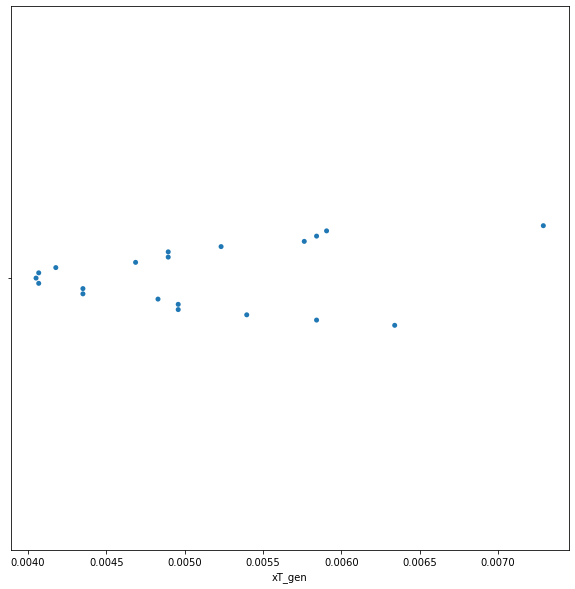

In [24]:
fig, ax = plt.subplots(figsize = (10,10))  #create figure and axes
sns.swarmplot(x="xT_gen", data=df_results.query("Zone == 1"),ax=ax)

<AxesSubplot:xlabel='xT_gen'>

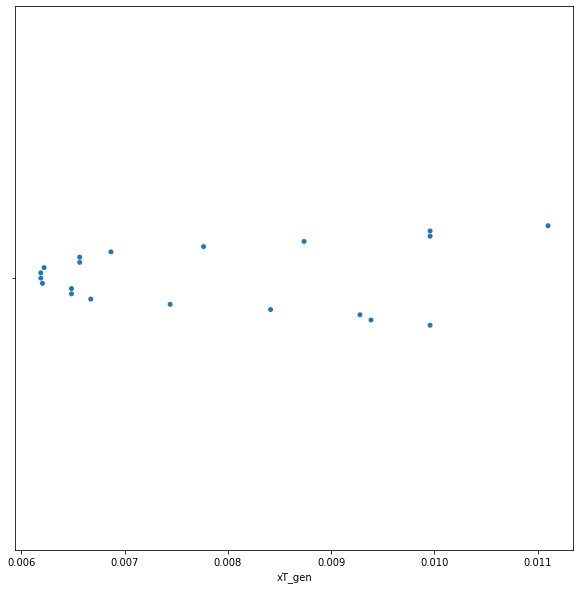

In [25]:
fig, ax = plt.subplots(figsize = (10,10))  #create figure and axes
sns.swarmplot(x="xT_gen", data=df_results.query("Zone == 2"),ax=ax)

<AxesSubplot:xlabel='xT_gen'>

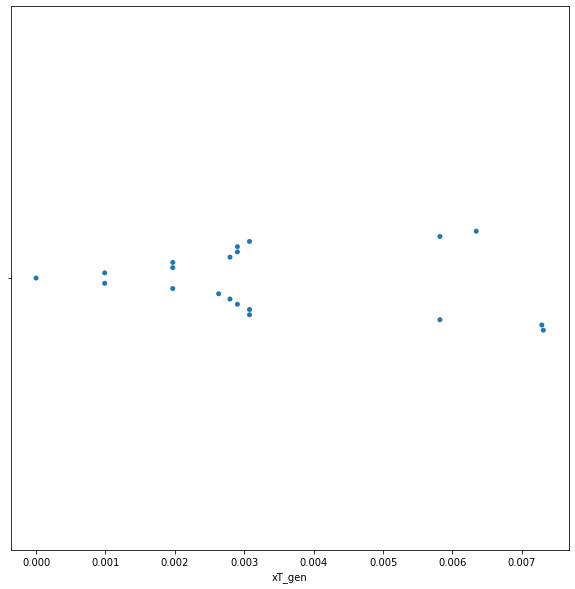

In [26]:
fig, ax = plt.subplots(figsize = (10,10))  #create figure and axes
sns.swarmplot(x="xT_gen", data=df_results.query("Zone == 3"),ax=ax)

In [18]:
teams

array([184,  32,  24, 167,  18, 162,  13, 170,  19,  26,  30,  31,  14,
       175,  29,  23, 211,  15, 161, 163], dtype=int64)

In [23]:
team_names = ['Burnley','Man Utd','Aston Villa','Man City','Southampton','Crystal Palace','Arsenal','Fulham','Leeds',
             'Liverpool','Tottenham','Everton','Leicester','West Brom','West Ham','Newcastle',
             'Brighton','Chelsea','Wolves','Sheffield Utd']

In [24]:
df_teams = pd.DataFrame(None)
df_teams['team'] = teams
df_teams['name'] = team_names 

df_teams

,team,name
0,184,Burnley
1,32,Man Utd
2,24,Aston Villa
3,167,Man City
4,18,Southampton
5,162,Crystal Palace
6,13,Arsenal
7,170,Fulham
8,19,Leeds
9,26,Liverpool


In [35]:
df_throw['possession_team'] = df_throw['possession_team'].map(df_teams.set_index('team')['name'])
df_throw['opposition_team'] = df_throw['opposition_team'].map(df_teams.set_index('team')['name'])
df_throw['end_team'] = df_throw['end_team'].map(df_teams.set_index('team')['name'])
#df['Group'].map(df1.set_index('Group')['Hotel'])

In [41]:
df_throw.groupby('possession_team').median()[['xT_gen','duration']]

,xT_gen,duration
possession_team,,
Arsenal,0.006188,15.0
Aston Villa,0.006204,10.0
Brighton,0.006485,13.0
Burnley,0.006565,11.0
Chelsea,0.005316,14.0
Crystal Palace,0.004651,8.0
Everton,0.005831,11.0
Fulham,0.006342,11.0
Leeds,0.006188,11.0


In [49]:
for team in team_names:
    print(team,",",
    df_throw.query('opposition_team == @team').shape[0],",",
    df_throw.query('opposition_team == @team and end_action in @action_list and end_team!=@team').shape[0],",",
    df_throw.query("opposition_team == @team and end_team != @team and end_action == 'Goal'").shape[0])

Burnley , 796 , 98 , 6
Man Utd , 648 , 55 , 5
Aston Villa , 735 , 74 , 7
Man City , 532 , 30 , 2
Southampton , 873 , 78 , 8
Crystal Palace , 815 , 76 , 9
Arsenal , 657 , 55 , 3
Fulham , 829 , 53 , 6
Leeds , 807 , 55 , 4
Liverpool , 613 , 40 , 5
Tottenham , 656 , 70 , 4
Everton , 794 , 69 , 7
Leicester , 831 , 45 , 7
West Brom , 822 , 92 , 14
West Ham , 670 , 69 , 6
Newcastle , 723 , 79 , 4
Brighton , 752 , 51 , 2
Chelsea , 821 , 51 , 4
Wolves , 676 , 59 , 5
Sheffield Utd , 841 , 92 , 5


In [36]:
df_throw.head()

,match_id,index,possession_team,minute,second,player,x,y,endX,endY,...,opposition_team,event_type,zone,adjX,adjY,x1_bin,y1_bin,x2_bin,y2_bin,xT_gen
0,0,15,Burnley,1,6.0,Erik Pieters,60.0,100.0,78.0,93.5,...,Man Utd,"[90, 116, 29, 34, 36, 214, 217]",2,59.8,34.9,7,7,7,2,0.001901
1,0,31,Man Utd,1,47.0,Bruno Fernandes,60.4,0.0,41.2,5.5,...,Burnley,"[90, 62]",2,40.6,9.2,7,0,4,0,-0.006188
2,0,84,Man Utd,3,59.0,Aaron Wan-Bissaka,63.7,0.0,66.0,9.2,...,Burnley,[92],2,63.6,26.6,7,0,7,2,0.001901
3,0,152,Burnley,7,24.0,Erik Pieters,38.1,100.0,37.5,89.1,...,Man Utd,"[90, 62]",2,42.2,89.4,4,7,5,7,0.001221
4,0,194,Burnley,10,17.0,Erik Pieters,67.5,100.0,81.5,85.1,...,Man Utd,"[90, 116, 29, 34, 36, 214, 217]",3,67.9,86.8,8,7,8,6,0.002794


In [36]:
df_throw.groupby('end_action').size()

end_action
Aerial                2
BallRecovery       2069
BallTouch          1154
BlockedPass         676
Claim                78
Clearance           897
CornerAwarded       643
End                 138
Foul               1762
Goal                121
GoodSkill             1
Interception        966
KeeperPickup        665
KeeperSweeper        10
MissedShots         489
OffsideGiven        217
OffsidePass         127
OffsideProvoked      51
Pass               2808
Punch                 6
Save                  2
SavedShot           745
ShieldBallOpp        66
Smother               6
Tackle             1060
TakeOn              115
Throw-in             17
dtype: int64